In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

feature = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2022SummerML/main/Day5/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2022SummerML/main/Day5/fish_market_label.csv')
test_feature = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2022SummerML/main/Day5/fish_market_test_feature.csv')
test_label = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2022SummerML/main/Day5/fish_market_test_label.csv')
x = feature.values
y = label.values
x_test = test_feature.values
y_test = test_label.values

In [ ]:
# Splitting the dataset

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.9, test_size = 0.1, random_state = 42)

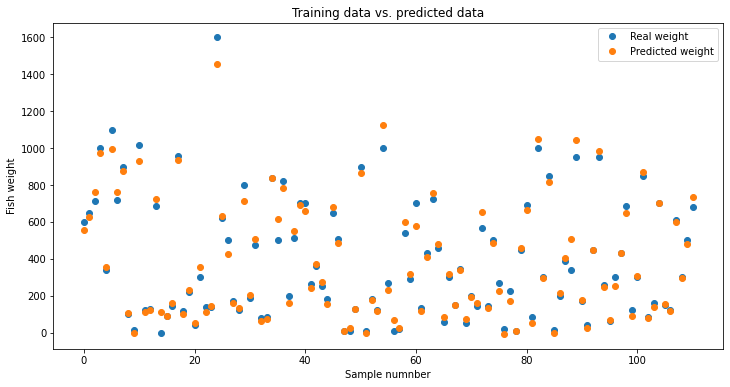

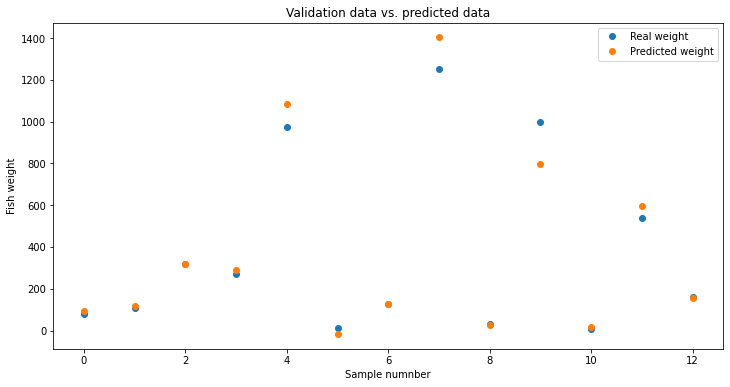

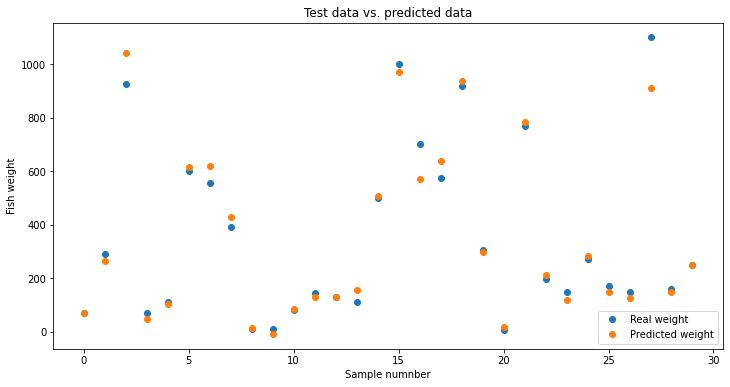

In [ ]:
# Creating the design matrix

M = 2

def design_matrix(x_train, M):
  dm = np.ones((x_train.shape[0], 1))
  for j in range(M):
    dm = np.hstack((dm, x_train**(j + 1)))
  return dm

X_train = design_matrix(x_train, M)

# Plotting training data vs. predicted data

reg = linear_model.Ridge(alpha=0.05, fit_intercept = True)

reg.fit(X_train, y_train)

y_train_hat = reg.predict(X_train)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, 111), y_train, "o")
plt.plot(np.arange(0, 111), y_train_hat, "o")
plt.title("Training data vs. predicted data")
plt.xlabel("Sample numnber")
plt.ylabel("Fish weight")
plt.legend(["Real weight", "Predicted weight"])
plt.show()

# Plotting validation data vs. predicted data

X_val = design_matrix(x_val, M)

y_val_hat = reg.predict(X_val)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, 13), y_val, "o")
plt.plot(np.arange(0, 13), y_val_hat, "o")
plt.title("Validation data vs. predicted data")
plt.xlabel("Sample numnber")
plt.ylabel("Fish weight")
plt.legend(["Real weight", "Predicted weight"])
plt.show()

# Plotting test data vs. predicted data

X_test = design_matrix(x_test,M)

y_test_hat = reg.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, 30), y_test, "o")
plt.plot(np.arange(0, 30), y_test_hat, "o")
plt.title("Test data vs. predicted data")
plt.xlabel("Sample numnber")
plt.ylabel("Fish weight")
plt.legend(["Real weight", "Predicted weight"])
plt.show()

In [ ]:
# Computing the errors

mse_train = metrics.mean_squared_error(y_train, y_train_hat)
rmse_train = mse_train**0.5
mae_train = metrics.mean_absolute_error(y_train, y_train_hat)

rmse_val = metrics.mean_squared_error(y_val, y_val_hat, squared = False)
mse_val = rmse_val**2
mae_val = metrics.mean_absolute_error(y_val, y_val_hat)

rmse_test = metrics.mean_squared_error(y_test, y_test_hat, squared = False)
mse_test = rmse_test**2
mae_test = metrics.mean_absolute_error(y_test, y_test_hat)

print(f"The RMSE training error is {rmse_train:.3f}.")
print(f"The RMSE validation error is {rmse_val:.3f}.")
print(f"The RMSE test error is {rmse_test:.3f}. \n")
print(f"The MAE training error is {mae_train:.3f}.")
print(f"The MAE validation error is {mae_val:.3f}.")
print(f"The MAE test error is {mae_test:.3f}. \n")
print(f"The MSE training error is {mse_train:.3f}.")
print(f"The MSE validation error is {mse_val:.3f}.")
print(f"The MSE test error is {mse_test:.3f}.")

The RMSE training error is 44.393.
The RMSE validation error is 78.539.
The RMSE test error is 52.665. 

The MAE training error is 30.172.
The MAE validation error is 46.924.
The MAE test error is 31.998. 

The MSE training error is 1970.709.
The MSE validation error is 6168.344.
The MSE test error is 2773.603.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.02753e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.00382e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.14552e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.15223e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

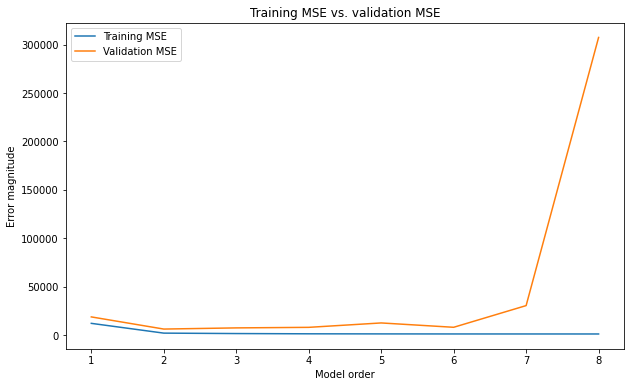

In [ ]:
# Finding the optimal M

for i in range(1, 9):
  X_train = design_matrix(x_train, i)
  X_val = design_matrix(x_val, i)
  reg = linear_model.Ridge(alpha = 0.05, fit_intercept = True)
  reg.fit(X_train, y_train)
  y_train_hat = reg.predict(X_train)
  mse_train = metrics.mean_squared_error(y_train, y_train_hat, squared = True)
  y_val_hat = reg.predict(X_val)
  mse_val = metrics.mean_squared_error(y_val, y_val_hat, squared = True)

x_axis = np.arange(1, 9)
y_axis_1 = [12064.495, 1970.709, 1530.585, 1274.388, 1179.041, 1120.116, 1108.414, 1098.512]
y_axis_2 = [18721.135, 6168.344, 7378.632, 7944.046, 12491.211, 8000.939, 30401.117, 307306.209]

plt.figure(figsize = (10, 6))
plt.plot(x_axis, y_axis_1)
plt.plot(x_axis, y_axis_2)
plt.title("Training MSE vs. validation MSE")
plt.xlabel("Model order")
plt.ylabel("Error magnitude")
plt.legend(["Training MSE", "Validation MSE"])
plt.show()